<a href="https://colab.research.google.com/github/kahfirk/Netflix-DB-Design-EDA-with-MySQL/blob/main/Data%20Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Database Design: 


##Conceptual Entity Relationship Diagram (ERD)


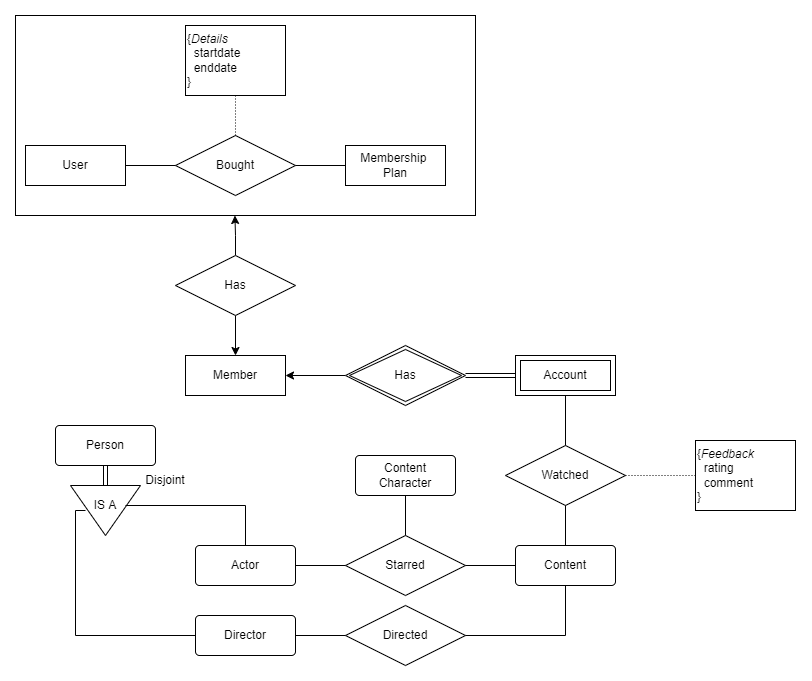

## Relational Database Design: 


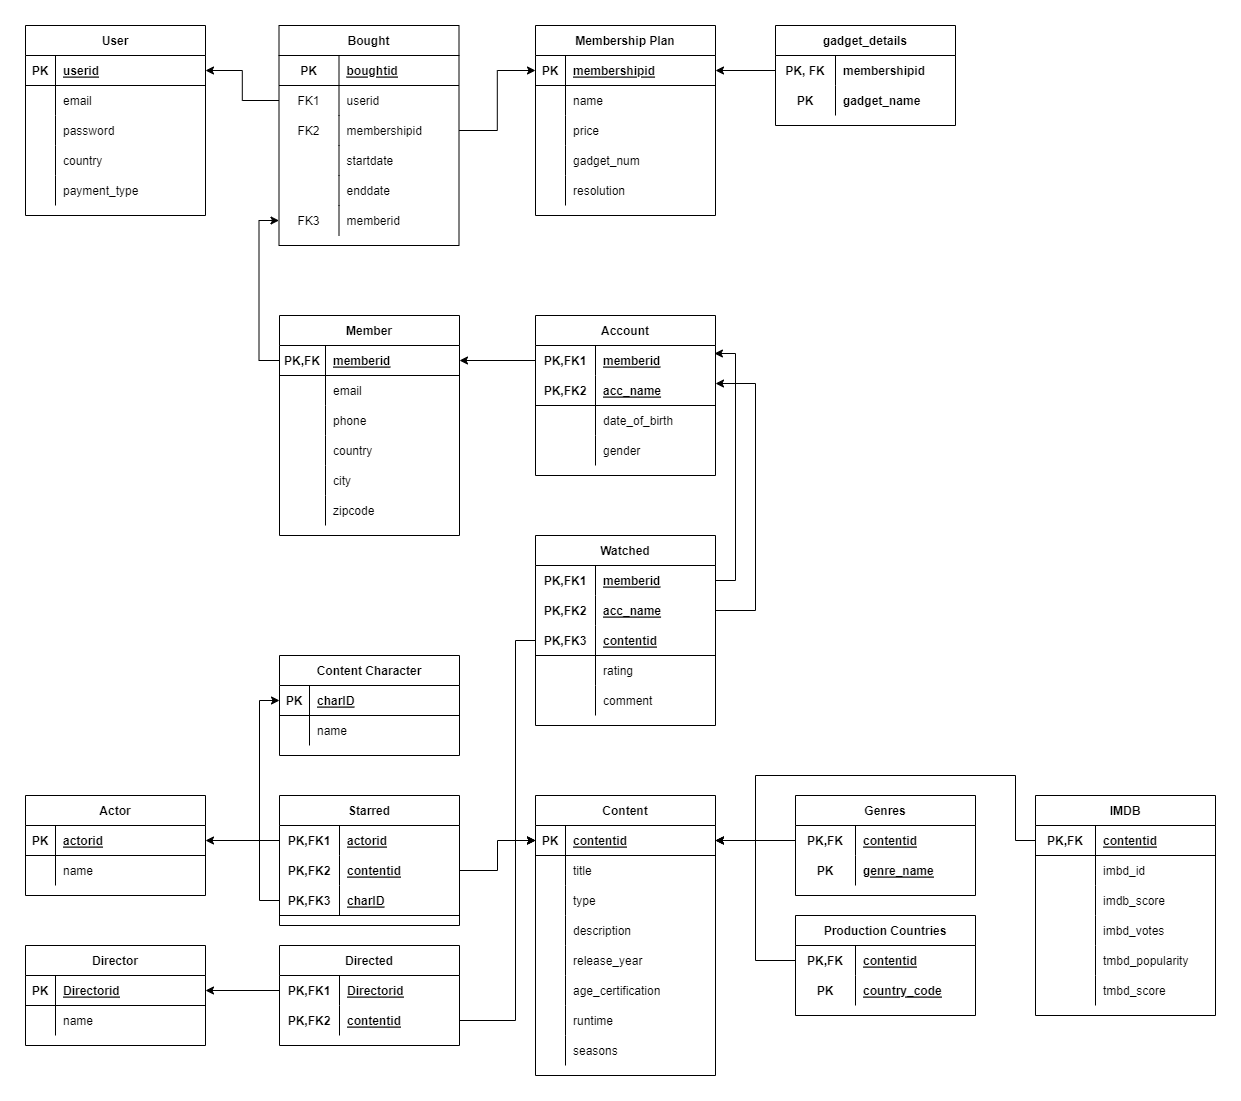

#Data Load

## Connect GD

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Portofolio/Data_Related/Netflics/Kaggle_Data/

/content/gdrive/MyDrive/Portofolio/Data_Related/Netflics/Kaggle_Data


## Import Data

In [ ]:
import pandas as pd

### Data Content

In [ ]:
df_content = pd.read_csv("titles.csv")

### Data Person

In [ ]:
df_person = pd.read_csv("credits.csv")

# Data Understanding

### Data Content

In [ ]:
df_content.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [ ]:
df_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [ ]:
display(df_content.describe()) ; print()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [ ]:
for item in df_content.columns :
  print(df_content[item].value_counts())
  print("\n===============================================================\n")

ts300399    1
ts223238    1
ts237014    1
tm835486    1
tm824559    1
           ..
ts79926     1
tm313683    1
ts78558     1
tm319818    1
ts271048    1
Name: id, Length: 5806, dtype: int64


The Gift                              3
Connected                             3
The Heirs                             2
Manhunt                               2
The Platform                          2
                                     ..
Troy: Fall of a City                  1
To All the Boys I've Loved Before     1
Extinction                            1
When We First Met                     1
Mighty Little Bheem: Kite Festival    1
Name: title, Length: 5751, dtype: int64


MOVIE    3759
SHOW     2047
Name: type, dtype: int64


Five families struggle with the ups and downs of cancer treatment over the course of six years.                                                                                                                                                                               

In [ ]:
def characteristic_function(df_content,item,i,j):
  if i == 0 :
    return df_content.columns[j]
  elif i == 1 : 
    percentage = (len(df_content)-df_content[item].isnull().value_counts()[False])/len(df_content) * 100
    percentage = round(percentage,3)
    return percentage
  elif i == 2 : 
    return len(pd.unique(df_content[item].dropna()))
  elif i == 3 : 
    return str(df_content.dtypes[item])
  elif i == 4 :
    banyak_unique = len(pd.unique(df_content[item].dropna()))
    dumdum = ""
    if banyak_unique <= 8: 
      dumdum = dumdum + str(pd.unique(df_content[item].dropna()))
      if str(df_content.dtypes[item]) != "object":
        dumdum = dumdum + f"({round(min(pd.unique(df_content[item].dropna())),3)} s.d. {round(max(pd.unique(df_content[item].dropna())),3)})"
    else:
      if str(df_content.dtypes[item]) != "object":
        dumdum = dumdum + f"{round(min(pd.unique(df_content[item].dropna())),3)} s.d. {round(max(pd.unique(df_content[item].dropna())),3)}"
      else:
        dumdum = dumdum + "Tidak Ada"
    return dumdum

def df_characteristic_generator(df_content):
  Dummy = [[] for i in range (len(df_content.columns))]
  j = 0  
  for item in df_content.columns : 
    for i in range (5):
      hasil = characteristic_function(df_content,item,i,j)
      Dummy[j].append(hasil)
    j += 1
  df_characteristic = pd.DataFrame({
      "Nama Kolom": [i[0] for i in Dummy],
      "Persentase Null (%)": [i[1] for i in Dummy],
      "Banyak Unique Value":[i[2] for i in Dummy],
      "Tipe Data":[i[3] for i in Dummy],
      "Keterangan":[i[4] for i in Dummy],
      })
  return df_characteristic


In [ ]:
df_content_characteristic = df_characteristic_generator(df_content)
display(df_content_characteristic)

,Nama Kolom,Persentase Null (%),Banyak Unique Value,Tipe Data,Keterangan
0,id,0.000,5806,object,Tidak Ada
1,title,0.017,5751,object,Tidak Ada
2,type,0.000,2,object,['SHOW' 'MOVIE']
3,description,0.310,5785,object,Tidak Ada
4,release_year,0.000,67,int64,1945 s.d. 2022
5,age_certification,44.953,11,object,Tidak Ada
6,runtime,0.000,205,int64,0 s.d. 251
7,genres,0.000,1626,object,Tidak Ada
8,production_countries,0.000,449,object,Tidak Ada
9,seasons,64.743,23,float64,1.0 s.d. 42.0


### Data Person

In [ ]:
df_person.head(5)

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [ ]:
df_person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77213 non-null  int64 
 1   id         77213 non-null  object
 2   name       77213 non-null  object
 3   character  67586 non-null  object
 4   role       77213 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [ ]:
for item in df_person.columns :
  print(df_person[item].value_counts())
  print("\n===============================================================\n")

38632      30
38636      25
1345       25
48004      25
69034      22
           ..
234858      1
1964056     1
1964491     1
1964035     1
2050423     1
Name: person_id, Length: 53956, dtype: int64


tm32982     208
tm244149    174
tm84613     150
tm467467    139
tm158304    137
           ... 
tm324806      1
tm21911       1
tm348919      1
ts343426      1
ts216698      1
Name: id, Length: 5434, dtype: int64


Shah Rukh Khan         30
Anupam Kher            25
Boman Irani            25
Kareena Kapoor Khan    25
Paresh Rawal           22
                       ..
Jacky Cai               1
Jan Tse                 1
Tsui Ching-Man          1
Sam Chan Yu-Sum         1
Yemi Amodu              1
Name: name, Length: 53687, dtype: int64


Self                      1667
Himself                   1237
Herself                    444
Self (archive footage)     327
Dancer                     168
                          ... 
Chewey                       1
The Ghost                    1
Barack H

In [ ]:
df_content_characteristic = df_characteristic_generator(df_person)
display(df_content_characteristic)

,Nama Kolom,Persentase Null (%),Banyak Unique Value,Tipe Data,Keterangan
0,person_id,0.000,53956,int64,7 s.d. 2371585
1,id,0.000,5434,object,Tidak Ada
2,name,0.000,53687,object,Tidak Ada
3,character,12.468,47125,object,Tidak Ada
4,role,0.000,2,object,['ACTOR' 'DIRECTOR']


#Create Database Tabel Based on Design

In [ ]:
def output_table(arr,table,condition):
  for i in range (len(arr)):
    print(f'{table[i]} Table:\n') ; display(arr[i])
    if i != len(arr) - 1 :
      print("\n==========================================================================\n")
  if condition == "download":
    py_to_csv (arr,table)

def py_to_csv (arr,table):
  for i in range (len(arr)):
    arr[i].to_csv(f'netflics-{table[i]}.csv',index=False,header=False)

###Data Derived from Kaggle

####Actor & Director Table

In [ ]:
df_actor = df_person[["person_id","name"]][df_person["role"] == "ACTOR"].drop_duplicates()
df_director = df_person[["person_id","name"]][df_person["role"] == "DIRECTOR"].drop_duplicates()
df_actor = df_actor.fillna("NULL") ; df_director = df_director.fillna("NULL")

output_table([df_actor,df_director],['actor','director'],'download')

actor Table:



,person_id,name
0,3748,Robert De Niro
1,14658,Jodie Foster
2,7064,Albert Brooks
3,3739,Harvey Keitel
4,48933,Cybill Shepherd
...,...,...
77207,2050257,Pa Jimi Solanke
77208,1347054,Nnenna Rachael Okonkwo
77209,157590,Lucien Morgan
77210,129059,Magdalena Korpas




director Table:



,person_id,name
36,3308,Martin Scorsese
83,11475,Terry Jones
84,11473,Terry Gilliam
148,14255,William Friedkin
211,56405,Don Siegel
...,...,...
77158,918476,Stanley D'Costa
77172,1790433,Easy Ferrer
77186,1278319,Kürşad Bayhan
77197,363804,Pascal Atuma


####Starred, Directed, & Content Character Table

In [ ]:
df_dummy = df_person.copy(deep=True)
df_dummy = df_dummy.assign(char_id = [i+1 for i in range (77213)])

df_starred = df_dummy[["person_id","id","char_id"]][df_dummy["role"]=="ACTOR"].drop_duplicates()
df_content_character = df_dummy[["char_id","character"]][df_dummy["role"]=="ACTOR"].drop_duplicates()
df_directed = df_person[["person_id","id"]][df_person['role']=="DIRECTOR"].drop_duplicates()
df_starred = df_starred.fillna("NULL") ; df_content_character = df_content_character.fillna("NULL") ; df_directed = df_directed.fillna("NULL")

output_table([df_starred,df_content_character,df_directed],['starred','content_character','directed'],'download')


starred Table:



,person_id,id,char_id
0,3748,tm84618,1
1,14658,tm84618,2
2,7064,tm84618,3
3,3739,tm84618,4
4,48933,tm84618,5
...,...,...,...
77207,2050257,tm1098060,77208
77208,1347054,tm1098060,77209
77209,157590,tm1098060,77210
77210,129059,tm1098060,77211




content_character Table:



,char_id,character
0,1,Travis Bickle
1,2,Iris Steensma
2,3,Tom
3,4,Matthew 'Sport' Higgins
4,5,Betsy
...,...,...
77207,77208,Akanji's Father
77208,77209,Afinni
77209,77210,Dr. Ian Stones
77210,77211,Jane




directed Table:



,person_id,id
36,3308,tm84618
83,11475,tm127384
84,11473,tm127384
106,11475,tm70993
148,14255,tm190788
...,...,...
77172,1790433,tm1040816
77184,1962840,tm1014599
77186,1278319,tm1108171
77197,363804,tm1045018


####Content, Genres, & Production Countries Table

In [ ]:
df_dummy_content = df_content[["id","title","type","description","release_year","age_certification","runtime",'seasons']]

display(df_dummy_content)

,id,title,type,description,release_year,age_certification,runtime,seasons
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,1.0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,NaN
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,NaN
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,NaN
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,NaN
...,...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,NaN
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,NaN
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,NaN
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,NaN


In [ ]:
def string_to_array(df_content,col):
  dumm = []
  if col == 'genres':
    is_in = " abcdefghijklmnopqrstuvwxyz"
  else:
    is_in = " ABCDEFGHIJKLMNOPQRSTUVWXYZ"; 
  for i in range (len(df_content)):
    hasil = ""
    for item in df_content[col].to_list()[i][2:-2]:
      for itemz in is_in:
        if item == itemz:
          hasil += item 
          break
    Hasil = hasil.split()
    dumm.append(Hasil)
  return dumm

In [ ]:
genres_table = string_to_array(df_content,"genres")
production_countries_table = string_to_array(df_content,"production_countries")

In [ ]:
# Check 
print(genres_table)
print(production_countries_table)

[['documentation'], ['crime', 'drama'], ['comedy', 'fantasy'], ['comedy'], ['horror'], ['comedy', 'european'], ['thriller', 'crime', 'action'], ['drama', 'music', 'romance', 'family'], ['romance', 'drama'], ['drama', 'crime', 'action'], ['western', 'action', 'european'], ['war', 'action', 'drama'], ['comedy', 'animation', 'action', 'fantasy', 'family'], ['comedy', 'documentation'], ['western', 'crime'], ['romance', 'comedy', 'music'], ['drama', 'crime', 'comedy'], ['documentation'], ['documentation', 'history', 'european'], ['comedy', 'documentation', 'music'], ['drama', 'war', 'action', 'history', 'romance'], ['drama', 'thriller', 'crime'], ['drama', 'action', 'romance', 'thriller'], ['drama'], ['drama', 'thriller', 'crime', 'history'], ['comedy', 'drama'], ['fantasy'], ['drama', 'comedy', 'romance', 'action', 'crime'], ['romance', 'crime', 'drama'], ['comedy'], ['drama', 'crime'], ['romance'], ['comedy'], ['comedy'], ['comedy'], ['comedy', 'drama', 'romance'], ['drama'], ['documentat

In [ ]:
df_genres = pd.DataFrame({
    "contentid":[],
    "genre_name":[]
})

df_production_countries_table = pd.DataFrame({
    "contentid":[],
    "country_code":[]
})

for i in range (len(df_content["id"])):
  if len(genres_table) != 0 :
    temp_df = pd.DataFrame({
        "contentid":[df_content["id"][i] for j in range (len(genres_table[i]))],
        "genre_name":genres_table[i]
        })
    df_genres = df_genres.append(temp_df,ignore_index="True") 

  if len(production_countries_table) != 0 :
    temp_df = pd.DataFrame({
        "contentid":[df_content["id"][i] for j in range (len(production_countries_table[i]))],
        "country_code":production_countries_table[i]
        })
    df_production_countries_table = df_production_countries_table.append(temp_df,ignore_index="True") 

In [ ]:
df_dummy_content = df_dummy_content.fillna("NULL") ; df_genres = df_genres.fillna("NULL") ; df_production_countries_table = df_production_countries_table.fillna("NULL")

output_table([df_dummy_content,df_genres,df_production_countries_table],['content','genres','production_countries_table'],'download')

content Table:



,id,title,type,description,release_year,age_certification,runtime,seasons
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,1.0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,NULL
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,NULL
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,NULL
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,NULL
...,...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NULL,100,NULL
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NULL,74,NULL
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NULL,88,NULL
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NULL,116,NULL




genres Table:



,contentid,genre_name
0,ts300399,documentation
1,tm84618,crime
2,tm84618,drama
3,tm127384,comedy
4,tm127384,fantasy
...,...,...
14553,tm1098060,action
14554,tm1098060,thriller
14555,ts271048,family
14556,ts271048,comedy




production_countries_table Table:



,contentid,country_code
0,ts300399,US
1,tm84618,US
2,tm127384,GB
3,tm70993,GB
4,tm190788,US
...,...,...
6489,ts307884,NG
6490,tm1040816,PH
6491,tm1014599,NG
6492,tm1045018,NG


####IMDB Table

In [ ]:
df_IMDB = df_content[["id","imdb_id","imdb_score","imdb_votes","tmdb_popularity","tmdb_score"]]
df_IMDB = df_IMDB.fillna("NULL")

output_table([df_IMDB],['imdb'],'download')

imdb Table:



,id,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,NULL,NULL,NULL,0.6,NULL
1,tm84618,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,tt0070047,8.1,391942.0,95.337,7.7
...,...,...,...,...,...,...
5801,tm1014599,tt13857480,6.9,39.0,0.966,NULL
5802,tm1108171,NULL,NULL,NULL,1.036,8.5
5803,tm1045018,tt14620732,6.5,32.0,0.709,NULL
5804,tm1098060,tt10168094,6.2,9.0,2.186,NULL


#Data Cleansing & Preprocessing

###Data Content

In [ ]:
for item in mcol_content :
  print("Missing value in {} column\n".format(item))
  display(df_content[df_content[item].isnull()])
  print("\n===============================================================\n")

Missing value in title column



,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1805,tm1063792,NaN,MOVIE,NaN,2015,NaN,11,[],[],NaN,tt4661188,NaN,NaN,NaN,NaN




Missing value in description column



,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1186,tm681614,Grandmother's Farm,MOVIE,NaN,2013,NaN,71,"['comedy', 'horror']",[],NaN,tt10033686,2.9,74.0,NaN,NaN
1196,ts271005,幸福料理,SHOW,NaN,2014,TV-14,44,[],[],1.0,NaN,NaN,NaN,0.600,NaN
1805,tm1063792,NaN,MOVIE,NaN,2015,NaN,11,[],[],NaN,tt4661188,NaN,NaN,NaN,NaN
2310,ts82770,Camarón Revolution,SHOW,NaN,2018,TV-14,52,['reality'],['ES'],1.0,NaN,NaN,NaN,1.673,7.0
2480,ts82375,Beyblade Burst Turbo,SHOW,NaN,2018,TV-Y7,24,"['action', 'scifi']",['JP'],1.0,NaN,NaN,NaN,0.600,0.5
2727,ts90941,"Heidi, bienvenida a casa",SHOW,NaN,2017,TV-Y,46,"['comedy', 'family']",['AR'],1.0,tt7183310,6.2,20.0,4.135,8.8
2888,tm407349,The Birth Reborn 2,MOVIE,NaN,2018,PG,91,['documentation'],['BR'],NaN,tt16114198,6.6,5.0,0.738,5.8
3019,ts106612,Chicken Soup for the Soul's Being Dad,SHOW,NaN,2018,TV-PG,40,['reality'],[],1.0,tt8908110,NaN,NaN,NaN,NaN
3129,ts268283,RIDE ON TIME,SHOW,NaN,2018,TV-PG,24,[],['JP'],3.0,NaN,NaN,NaN,1.524,NaN
3746,ts312044,Beyblade Burst Surge,SHOW,NaN,2020,TV-Y,23,['animation'],[],1.0,tt18554728,NaN,NaN,10.678,9.5




Missing value in age_certification column



,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
11,tm44204,The Guns of Navarone,MOVIE,A team of allied saboteurs are assigned an imp...,1961,NaN,158,"['war', 'action', 'drama']","['US', 'GB']",NaN,tt0054953,7.5,50150.0,15.405,7.4
15,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NaN,115,"['romance', 'comedy', 'music']",['US'],NaN,tt0047673,7.5,42373.0,9.710,7.2
16,tm135083,Cairo Station,MOVIE,"Qinawi, a physically challenged peddler who ma...",1958,NaN,77,"['drama', 'crime', 'comedy']",['EG'],NaN,tt0051390,7.5,4385.0,3.556,7.4
17,tm14491,The Queen,MOVIE,"In 1967, New York City is host to the Miss All...",1968,NaN,68,['documentation'],['US'],NaN,tt0183686,7.2,1117.0,2.419,6.5
20,tm27298,Saladin the Victorious,MOVIE,"Saladin, the first sultan of Egypt and Syria, ...",1963,NaN,186,"['drama', 'war', 'action', 'history', 'romance']",['EG'],NaN,tt0057357,7.6,2470.0,4.816,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,0.966,NaN
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN,1.036,8.5
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,0.709,NaN
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN




Missing value in seasons column



,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
6,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0,14.745,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,['comedy'],['PH'],NaN,tt14412240,5.8,26.0,4.112,NaN
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,0.966,NaN
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN,1.036,8.5
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,0.709,NaN




Missing value in imdb_id column



,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
32,tm97793,Lock Your Girls In,MOVIE,Dr. Raafat faces challenges and difficulties i...,1980,NaN,230,['comedy'],['EG'],NaN,NaN,NaN,NaN,2.313,8.0
33,tm85426,The Witness Who Didn't See Anything,MOVIE,"An Egyptian comedy play about an innocent, clu...",1976,NaN,217,['comedy'],['EG'],NaN,NaN,NaN,NaN,2.612,7.7
34,tm188894,The School of Mischief,MOVIE,This play is about a female teacher and how sh...,1973,NaN,251,['comedy'],['EG'],NaN,NaN,NaN,NaN,3.381,8.5
91,tm126791,The Married Couples,MOVIE,The story revolves around the problems of marr...,1981,NaN,194,['drama'],['EG'],NaN,NaN,NaN,NaN,1.532,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5780,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,NaN,35,[],['US'],NaN,NaN,NaN,NaN,NaN,NaN
5783,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.060,10.0
5794,ts297061,Masameer County,SHOW,"A humorous view of a changing Saudi Arabia, as...",2021,TV-MA,23,[],['SA'],1.0,NaN,NaN,NaN,0.959,8.0
5799,ts307884,HQ Barbers,SHOW,When a family run barber shop in the heart of ...,2021,TV-14,24,['comedy'],['NG'],1.0,NaN,NaN,NaN,0.600,NaN




Missing value in imdb_score column



,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
32,tm97793,Lock Your Girls In,MOVIE,Dr. Raafat faces challenges and difficulties i...,1980,NaN,230,['comedy'],['EG'],NaN,NaN,NaN,NaN,2.313,8.0
33,tm85426,The Witness Who Didn't See Anything,MOVIE,"An Egyptian comedy play about an innocent, clu...",1976,NaN,217,['comedy'],['EG'],NaN,NaN,NaN,NaN,2.612,7.7
34,tm188894,The School of Mischief,MOVIE,This play is about a female teacher and how sh...,1973,NaN,251,['comedy'],['EG'],NaN,NaN,NaN,NaN,3.381,8.5
91,tm126791,The Married Couples,MOVIE,The story revolves around the problems of marr...,1981,NaN,194,['drama'],['EG'],NaN,NaN,NaN,NaN,1.532,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.060,10.0
5793,ts296698,Glimpses of a Future,SHOW,A few weeks into the first COVID-19 lockdown i...,2021,TV-PG,4,[],[],1.0,tt14754320,NaN,NaN,0.600,NaN
5794,ts297061,Masameer County,SHOW,"A humorous view of a changing Saudi Arabia, as...",2021,TV-MA,23,[],['SA'],1.0,NaN,NaN,NaN,0.959,8.0
5799,ts307884,HQ Barbers,SHOW,When a family run barber shop in the heart of ...,2021,TV-14,24,['comedy'],['NG'],1.0,NaN,NaN,NaN,0.600,NaN




Missing value in imdb_votes column



,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
32,tm97793,Lock Your Girls In,MOVIE,Dr. Raafat faces challenges and difficulties i...,1980,NaN,230,['comedy'],['EG'],NaN,NaN,NaN,NaN,2.313,8.0
33,tm85426,The Witness Who Didn't See Anything,MOVIE,"An Egyptian comedy play about an innocent, clu...",1976,NaN,217,['comedy'],['EG'],NaN,NaN,NaN,NaN,2.612,7.7
34,tm188894,The School of Mischief,MOVIE,This play is about a female teacher and how sh...,1973,NaN,251,['comedy'],['EG'],NaN,NaN,NaN,NaN,3.381,8.5
91,tm126791,The Married Couples,MOVIE,The story revolves around the problems of marr...,1981,NaN,194,['drama'],['EG'],NaN,NaN,NaN,NaN,1.532,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.060,10.0
5793,ts296698,Glimpses of a Future,SHOW,A few weeks into the first COVID-19 lockdown i...,2021,TV-PG,4,[],[],1.0,tt14754320,NaN,NaN,0.600,NaN
5794,ts297061,Masameer County,SHOW,"A humorous view of a changing Saudi Arabia, as...",2021,TV-MA,23,[],['SA'],1.0,NaN,NaN,NaN,0.959,8.0
5799,ts307884,HQ Barbers,SHOW,When a family run barber shop in the heart of ...,2021,TV-14,24,['comedy'],['NG'],1.0,NaN,NaN,NaN,0.600,NaN




Missing value in tmdb_popularity column



,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
472,ts74931,Kung Fu Panda Awesome Secrets,SHOW,"In this pair of adventures, Po tells the story...",2008,NaN,0,"['action', 'comedy', 'family', 'animation']",['US'],1.0,tt6963796,7.2,55.0,NaN,NaN
547,ts137477,Behind Enemy Lines,SHOW,Documentary about the creation of the Commando...,2001,TV-14,49,['drama'],['US'],1.0,tt5170230,7.2,42.0,NaN,NaN
587,ts178360,El cartel 2 - La guerra total,SHOW,Now Pepe Cadena finishes telling the story in ...,2010,TV-MA,44,"['action', 'crime', 'horror', 'thriller', 'war']",['CO'],1.0,tt1667724,6.8,228.0,NaN,NaN
608,tm712151,Laugh Out Loud,MOVIE,The biggest stand-up comedy event ever in Sout...,2003,NaN,60,['comedy'],['ZA'],NaN,tt0401575,7.0,13.0,NaN,NaN
630,ts95855,Wedding Planner,SHOW,This is a love comedy that takes you behind th...,2002,TV-14,39,['drama'],[],1.0,tt7885290,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5678,tm1055586,Lethal Love,MOVIE,When a handsome man manipulates a mother and d...,2021,NaN,87,['thriller'],[],NaN,tt14403532,4.4,215.0,NaN,NaN
5715,tm1011248,30 March,MOVIE,"Ali, the fugitive from a murder he does not ev...",2021,NaN,99,"['drama', 'thriller', 'crime']",[],NaN,tt13694540,4.4,96.0,NaN,NaN
5772,tm1099342,Devdas Brothers,MOVIE,"After their first heartbreaks, four jilted you...",2021,NaN,99,['drama'],[],NaN,tt12478372,3.2,50.0,NaN,NaN
5774,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.8,339.0,NaN,NaN




Missing value in tmdb_score column



,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
93,tm311264,Muqaddar Ka Faisla,MOVIE,"Muqaddar ka Faisla, is the story of Pandit Kri...",1987,NaN,172,"['comedy', 'drama', 'family', 'action']",['IN'],NaN,tt0239682,4.8,68.0,1.825,NaN
97,tm342996,Duniya,MOVIE,Mohan Kumar's diligence and honesty lands him ...,1984,NaN,170,"['drama', 'action']",['IN'],NaN,tt0301231,6.2,241.0,1.476,NaN
98,ts63001,High Risk,SHOW,High Risk is a program aired by the CBS televi...,1988,TV-PG,50,['comedy'],['US'],1.0,tt0094478,3.8,6.0,0.600,NaN
99,tm411457,Pyar Ke Do Pal,MOVIE,"In order to assist her close friend, Rajni Tha...",1986,NaN,153,"['drama', 'action']",['IN'],NaN,tt0358053,6.1,65.0,1.094,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,ts307884,HQ Barbers,SHOW,When a family run barber shop in the heart of ...,2021,TV-14,24,['comedy'],['NG'],1.0,NaN,NaN,NaN,0.600,NaN
5800,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,['comedy'],['PH'],NaN,tt14412240,5.8,26.0,4.112,NaN
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,0.966,NaN
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,0.709,NaN


####Title Column

In [ ]:
# too much missing value in row with null values title, we can drop the row
df_content = df_content.drop(df_content.index[df_content.index[df_content['title'].isnull()]])

####Description Column

In [ ]:
# Percentage for movie with null values for description column is only 0.31 %
# it's such a waste to drop row with null values in description column 
# we can fill it with "The description is not yet made by the author." 

df_content[["description"]]= df_content[["description"]].fillna(value = "Missing")

####Age_certification column

In [ ]:
# Persentase null values pada age_certification cukup tinggi, 44 % 
# Akan dilakukan fill dengan "Missing" agar dapat berperan sebagai 
# kategorikal encoding pada peninjauan machine learning nanti

df_content[["age_certification"]]= df_content[["age_certification"]].fillna(value = "Missing")

####Seasons Column

In [ ]:
df_dummy = df_content[(df_content["seasons"].isnull())]
df_dummy

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
6,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0,14.745,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,Missing,108,['comedy'],['PH'],NaN,tt14412240,5.8,26.0,4.112,NaN
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,Missing,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,0.966,NaN
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,Missing,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN,1.036,8.5
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,Missing,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,0.709,NaN


In [ ]:
dummy1 = df_content["title"].value_counts().to_list()
dummy2 = df_content["title"].value_counts().index.to_list()
dummy3 = [] ; dummy4 = []
for i in range (len(dummy1)):
  if dummy1[i] >= 2 :
    dummy3.append(dummy2[i])
    dummy4.append(dummy1[i])
  else:
    break 
print(dummy3) 
print(dummy4)

['The Gift', 'Connected', 'The Heirs', 'Manhunt', 'The Platform', 'Warrior', 'Love O2O', 'Top Boy', 'Till Death', 'Black', 'Always Be My Maybe', 'The Good Cop', 'Cargo', 'Fearless', 'Monster', 'Christine', 'A Nightmare on Elm Street', 'A Second Chance', 'Ares', 'The One', 'Kakegurui', "She's Gotta Have It", 'Cloudy with a Chance of Meatballs', 'A Lion in the House', 'Zoo', 'Skylines', 'Danger Mouse', 'Zero', 'The Chase', 'The Club', 'Redemption', "Let's Dance", 'Whispers', 'Love', 'Extraction', 'The Forest', 'The Call', 'Security', 'Sergio', 'Cowboy Bebop', 'Chosen', 'The Motive', 'Bodyguard', 'Ludo', 'Time Out', 'Shooter', 'Heist', 'U Turn', 'Sugar Rush', 'Taxi Driver', 'Dostana', 'Into the Wind']
[3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [ ]:
for i in range (len(dummy3)):
  df_dummy = df_content[df_content['title'] == dummy3[i] ]
  display(df_dummy)
  print("\n============================================================\n")

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1245,tm199607,The Gift,MOVIE,Simon and Robyn are a young married couple who...,2015,R,108,"['thriller', 'drama', 'documentation']","['AU', 'US']",NaN,tt4178092,7.1,151679.0,11.328,6.7
2779,tm362264,The Gift,MOVIE,Mashoto’s life in the city is a hustle. It’s a...,2017,Missing,85,['drama'],['TZ'],NaN,tt6856604,8.1,20.0,1.324,10.0
3399,ts223344,The Gift,SHOW,A painter in Istanbul embarks on a personal jo...,2019,TV-MA,45,"['scifi', 'drama', 'fantasy']",['TR'],3.0,tt10075318,7.0,21582.0,12.379,7.8


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
526,tm62369,Connected,MOVIE,A debt collector receives a call from a woman ...,2008,Missing,110,"['thriller', 'action', 'crime']","['CN', 'HK']",NaN,tt1156506,6.6,2256.0,7.895,6.3
3611,ts251617,Connected,SHOW,Science journalist Latif Nasser investigates t...,2020,TV-14,44,"['documentation', 'comedy']",['US'],1.0,tt12753692,7.5,1704.0,2.839,8.0
5673,tm1019822,Connected,MOVIE,"Argentine DJ Hernán Cattáneo, known for his ho...",2021,Missing,42,[],[],NaN,NaN,NaN,NaN,9.048,7.3


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1016,ts22445,The Heirs,SHOW,"Heirs follows a group of privileged, elite hig...",2013,Missing,59,"['drama', 'comedy', 'romance']",['KR'],1.0,tt3243098,7.5,10329.0,54.729,7.8
1540,tm234292,The Heirs,MOVIE,Teenagers’ leisure at full swing: a group of f...,2015,Missing,71,['drama'],['MX'],NaN,tt2903370,5.7,224.0,1.748,6.1


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1870,ts58133,Manhunt,SHOW,"Inspired by actual events, this true crime ant...",2017,TV-14,43,"['documentation', 'crime', 'thriller', 'drama']",['US'],2.0,tt5618256,8.1,57459.0,39.681,7.7
2458,tm311319,Manhunt,MOVIE,"Accused of a murder he didn't commit, a prosec...",2017,Missing,106,"['thriller', 'action', 'crime']","['HK', 'CN']",NaN,tt4537986,5.2,3210.0,19.634,5.6


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2397,ts111582,The Platform,SHOW,The Platform is a weekly variety show about st...,2018,TV-14,45,['music'],['ES'],2.0,tt8254954,6.2,7.0,NaN,NaN
3255,tm824398,The Platform,MOVIE,A vertical prison with one cell per level. Two...,2019,Missing,94,"['horror', 'scifi', 'thriller', 'european']",['ES'],NaN,tt8228288,7.0,207877.0,54.034,7.0


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
716,tm166548,Warrior,MOVIE,The youngest son of an alcoholic former boxer ...,2011,PG-13,140,"['drama', 'action', 'sport']",['US'],NaN,tt1291584,8.2,463276.0,74.092,7.8
2280,ts84646,Warrior,SHOW,A war veteran plagued by guilt over his final ...,2018,TV-MA,42,"['action', 'drama', 'crime']",['DK'],1.0,tt9249090,6.7,1966.0,7.274,6.5


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1504,ts41253,Love O2O,SHOW,What is it that makes a man fall in love with ...,2016,TV-14,45,"['drama', 'romance']",['CN'],1.0,tt6092878,8.0,2322.0,5.592,6.0
1755,tm244577,Love O2O,MOVIE,What is it that makes a man fall in love with ...,2016,Missing,105,"['romance', 'drama']",['CN'],NaN,tt6093452,6.4,998.0,6.117,6.9


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
715,ts33338,Top Boy,SHOW,A thrilling and raw crime drama following a ga...,2011,TV-MA,48,"['drama', 'thriller', 'crime', 'european']",['GB'],2.0,tt1830379,8.4,22420.0,18.036,7.4
3220,ts221016,Top Boy,SHOW,Two seasoned drug dealers return to the gritty...,2019,TV-MA,44,['drama'],['GB'],3.0,NaN,NaN,NaN,34.043,8.4


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
4911,tm1033470,Till Death,MOVIE,After a romantic evening at their secluded lak...,2021,R,89,"['horror', 'thriller']",['US'],NaN,tt11804152,5.8,19029.0,30.573,6.5
5543,ts285854,Till Death,SHOW,"Fed up with his wife’s distancing from him, Ha...",2021,TV-MA,53,['drama'],['LB'],2.0,NaN,NaN,NaN,194.914,6.7


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1764,tm456667,Black,MOVIE,"A boy. Who has no identity. One day, he want t...",2015,Missing,90,['action'],[],NaN,tt7254796,4.4,74.0,0.600,NaN
2530,ts75620,Black,SHOW,"A Grim Reaper, a detective and a woman who for...",2017,TV-MA,78,"['scifi', 'drama', 'action', 'thriller', 'horr...",['KR'],2.0,tt6380900,8.0,3665.0,18.754,8.0


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1559,tm239290,Always Be My Maybe,MOVIE,The story of Tintin and Jake as they both try ...,2016,Missing,112,"['comedy', 'romance']",['PH'],NaN,tt5341036,6.7,372.0,4.031,7.4
3260,tm460948,Always Be My Maybe,MOVIE,"Reunited after 15 years, famous chef Sasha and...",2019,PG-13,101,"['romance', 'comedy']",['US'],NaN,tt7374948,6.8,54166.0,14.207,6.6


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1558,ts86831,The Good Cop,SHOW,"Danny Confino is a full-time cop, during one o...",2015,TV-MA,30,"['comedy', 'drama']",['IL'],3.0,tt6070434,7.7,370.0,5.028,7.0
2112,ts81885,The Good Cop,SHOW,Honest cop Tony Jr. gets advice from his unscr...,2018,TV-PG,49,"['comedy', 'drama', 'crime', 'documentation']",['US'],1.0,tt7183074,6.9,5620.0,6.913,6.4


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1951,tm307283,Cargo,MOVIE,After being infected in the wake of a violent ...,2017,Missing,105,"['drama', 'thriller', 'horror', 'scifi']",['AU'],NaN,tt3860916,6.3,42722.0,13.102,6.4
4277,tm912190,Cargo,MOVIE,"Prahastha, a lonely astronaut, works in a spac...",2019,PG-13,113,"['drama', 'fantasy', 'scifi']",['IN'],NaN,tt8992946,5.6,2906.0,2.516,5.6


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1602,ts38812,Fearless,SHOW,On a journey from Brazil to the Las Vegas cham...,2016,Missing,43,"['documentation', 'reality']",['US'],2.0,tt9556710,7.1,299.0,2.313,8.0
4160,tm918962,Fearless,MOVIE,A teen gamer is forced to level up to full-tim...,2020,PG,89,"['comedy', 'scifi', 'documentation', 'animatio...",['CA'],NaN,tt8675288,4.9,1706.0,25.413,6.2


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
312,tm136308,Monster,MOVIE,An emotionally scarred highway drifter shoots ...,2003,R,110,"['crime', 'drama', 'thriller', 'european']",['US'],NaN,tt0340855,7.3,149218.0,16.951,7.2
5296,tm362072,Monster,MOVIE,"The story of Steve Harmon, a 17-year-old honor...",2021,R,98,"['drama', 'crime']","['CA', 'US']",NaN,tt10229074,6.5,5574.0,12.751,6.5


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
53,tm54450,Christine,MOVIE,Geeky student Arnie Cunningham falls for Chris...,1983,R,90,"['horror', 'thriller', 'european']",['US'],NaN,tt0085333,6.7,80945.0,19.311,6.8
1285,tm209987,Christine,MOVIE,"The story of Christine Chubbuck, a 1970s TV re...",2016,R,115,['drama'],['US'],NaN,tt4666726,6.9,14977.0,8.408,6.8


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
54,tm2386,A Nightmare on Elm Street,MOVIE,Teenagers in a small town are dropping like fl...,1984,R,91,['horror'],['US'],NaN,tt0087800,7.4,230543.0,53.853,7.3
355,tm102337,A Nightmare on Elm Street,MOVIE,The film that brings back horror icon Freddy K...,2010,R,95,"['horror', 'thriller', 'crime', 'drama']",['US'],NaN,tt1179056,5.2,99192.0,46.304,5.5


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
823,tm183176,A Second Chance,MOVIE,A young girl and her coach overcome adversity ...,2011,Missing,90,"['drama', 'family', 'sport']",['AU'],NaN,tt2150139,4.7,1018.0,7.395,6.3
1731,tm232710,A Second Chance,MOVIE,"Popoy and Basha have had a wonderful wedding, ...",2015,Missing,130,"['romance', 'drama', 'family', 'sport', 'docum...",['PH'],NaN,tt5226380,8.6,47.0,3.425,7.1


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1419,tm245724,Ares,MOVIE,"In a near future, the world order has changed....",2016,Missing,80,"['scifi', 'thriller', 'drama', 'european']",['FR'],NaN,tt4216902,6.2,3994.0,8.343,6.1
3450,ts88296,Ares,SHOW,"When her friend suffers a bizarre accident, Ro...",2020,TV-MA,29,"['thriller', 'drama', 'horror']",['NL'],1.0,tt8404520,5.7,4298.0,12.337,7.1


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
339,tm57190,The One,MOVIE,A sheriff's deputy fights an alternate univers...,2001,PG-13,87,"['scifi', 'thriller', 'action']",['US'],NaN,tt0267804,5.9,91584.0,21.013,6.1
5008,ts272980,The One,SHOW,Love -- and lies -- spiral when a DNA research...,2021,TV-MA,42,"['crime', 'drama', 'scifi', 'thriller', 'action']",['GB'],1.0,tt13879466,6.6,12367.0,17.293,6.9


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2043,ts57814,Kakegurui,SHOW,Hyakkaou Private Academy. An institution for t...,2017,TV-14,24,"['action', 'animation', 'drama', 'thriller']",['JP'],2.0,tt7131720,7.2,8547.0,98.728,8.3
2395,ts78053,Kakegurui,SHOW,Children from influential families in politics...,2018,TV-MA,30,"['drama', 'thriller']",['JP'],2.0,tt7691766,6.8,966.0,24.535,7.9


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
61,tm117580,She's Gotta Have It,MOVIE,The story of Nola Darling's simultaneous sexua...,1986,R,84,"['comedy', 'romance']",['US'],NaN,tt0091939,6.7,14277.0,6.212,6.7
2097,ts58175,She's Gotta Have It,SHOW,Nola Darling struggles to define herself and d...,2017,TV-MA,32,['comedy'],['US'],2.0,tt0196291,6.8,4624.0,7.916,6.5


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
315,tm150260,Cloudy with a Chance of Meatballs,MOVIE,Inventor Flint Lockwood creates a machine that...,2009,PG,90,"['animation', 'drama', 'romance', 'comedy', 'f...",['US'],NaN,tt0844471,6.9,226225.0,54.58,6.6
2168,ts56201,Cloudy with a Chance of Meatballs,SHOW,"The series is a prequel, featuring the high sc...",2017,TV-Y7,11,"['action', 'fantasy', 'scifi', 'animation', 'c...",['CA'],2.0,tt4123482,3.4,750.0,12.41,5.8


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
519,tm25842,A Lion in the House,MOVIE,Five families struggle with the ups and downs ...,2006,Missing,225,['documentation'],['US'],NaN,tt0492472,8.7,312.0,2.821,6.5
657,ts19384,A Lion in the House,SHOW,Five families struggle with the ups and downs ...,2006,TV-14,225,['documentation'],['US'],1.0,NaN,NaN,NaN,1.271,7.5


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1332,ts35354,Zoo,SHOW,Set amidst a wave of violent animal attacks sw...,2015,TV-14,43,"['drama', 'thriller', 'scifi']",['US'],3.0,tt3250026,6.6,24479.0,60.53,6.6
2708,tm355941,Zoo,MOVIE,"Set in the heart of Mumbai, ZOO depicts lifest...",2018,Missing,100,['drama'],[],NaN,tt6149820,5.7,96.0,0.68,7.0


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3353,tm935309,Skylines,MOVIE,When a virus threatens to turn the now earth-d...,2020,R,113,"['scifi', 'action']","['FR', 'LT', 'GB']",NaN,tt9387250,4.7,7971.0,79.186,5.6
3481,ts104840,Skylines,SHOW,"In Frankfurt, A young, talented hip-hop produc...",2019,TV-MA,60,"['drama', 'music', 'crime', 'documentation', '...",['DE'],1.0,tt9184970,7.5,2627.0,4.302,7.1


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
67,ts987,Danger Mouse,SHOW,"Danger Mouse, the world's greatest secret agen...",1981,TV-Y,15,"['comedy', 'family', 'scifi', 'animation', 'eu...",['GB'],10.0,tt0081848,7.4,3514.0,7.748,7.4
1472,ts37779,Danger Mouse,SHOW,"Danger Mouse is back saving London, saving the...",2015,Missing,12,"['comedy', 'crime', 'family', 'fantasy', 'scif...",['GB'],2.0,tt4196822,7.2,579.0,8.182,7.6


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2258,tm365824,Zero,MOVIE,"Short in stature but big on love, a bachelor m...",2018,Missing,152,"['comedy', 'drama', 'scifi', 'romance', 'thril...",['IN'],NaN,tt6527426,5.2,27208.0,7.585,5.3
5441,ts282155,Zero,SHOW,A teenager who can make herself invisible is u...,2021,TV-MA,24,"['scifi', 'action', 'comedy', 'drama', 'fantasy']",['IT'],1.0,tt10619486,5.6,1270.0,7.106,7.6


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
972,ts4213,The Chase,SHOW,The Chase is a game show which premiered on Au...,2013,TV-PG,44,['reality'],['US'],5.0,tt3077336,7.5,886.0,1.639,8.0
2587,tm359975,The Chase,MOVIE,After people in his town start turning up dead...,2017,Missing,110,"['thriller', 'crime', 'drama']",['KR'],NaN,tt8088944,6.6,2957.0,5.392,6.7


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3937,ts245653,The Club,SHOW,Dealing with the pressure of his father and hi...,2019,TV-MA,34,"['comedy', 'drama']",['MX'],1.0,NaN,NaN,NaN,17.831,7.6
5146,ts313781,The Club,SHOW,The most unexpected people can become your cho...,2021,TV-14,47,"['drama', 'comedy']",['TR'],2.0,tt13317582,7.9,7810.0,7.232,7.2


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
974,tm165521,Redemption,MOVIE,Homeless and on the run from a military court ...,2013,R,100,"['thriller', 'action', 'european']","['US', 'GB']",NaN,NaN,NaN,NaN,59.493,6.2
4490,tm494190,Redemption,MOVIE,A young ex-con seeking redemption is surprised...,2019,Missing,100,"['action', 'drama', 'thriller']",['MZ'],NaN,tt8870574,6.0,171.0,3.337,6.8


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
626,tm897538,Let's Dance,MOVIE,A look into the problem of marital boredom thr...,2006,Missing,115,['drama'],['EG'],NaN,NaN,NaN,NaN,0.872,5.0
4222,tm421560,Let's Dance,MOVIE,"After his crew breaks up, a gifted but insecur...",2019,Missing,109,"['drama', 'comedy', 'music', 'family']","['FR', 'BE']",NaN,tt8599746,5.9,1381.0,10.018,6.5


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
38,tm259684,Whispers,MOVIE,"At every station, between sites filled with po...",1980,Missing,93,['documentation'],"['FR', 'LB', 'CA']",NaN,tt0170803,7.8,75.0,1.400,5.0
4401,ts241460,Whispers,SHOW,When suspicions grow around the death of their...,2020,TV-PG,41,['drama'],['SA'],2.0,NaN,NaN,NaN,2.843,8.3


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1294,ts38511,Love,SHOW,Rebellious Mickey and good-natured Gus navigat...,2016,TV-MA,32,"['drama', 'comedy', 'romance']",['US'],3.0,tt4061080,7.7,41362.0,23.492,7.3
4383,tm946277,Love,MOVIE,The story of a family and the various situatio...,2020,Missing,91,"['thriller', 'drama']",['IN'],NaN,tt12573294,7.0,1485.0,1.512,5.9


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1449,tm205935,Extraction,MOVIE,When a former CIA operative is kidnapped by a ...,2015,R,92,"['thriller', 'action']","['GB', 'US']",NaN,tt4382872,4.1,11180.0,19.682,4.6
3279,tm496322,Extraction,MOVIE,"Tyler Rake, a fearless black market mercenary,...",2020,R,116,"['thriller', 'crime', 'drama', 'action']",['US'],NaN,tt8936646,6.7,192132.0,55.868,7.4


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1356,tm200690,The Forest,MOVIE,"Set in the Aokigahara Forest, a real-life plac...",2016,R,95,"['thriller', 'scifi', 'drama', 'fantasy', 'hor...",['US'],NaN,tt3387542,4.8,42148.0,27.630,5.2
2046,ts57424,The Forest,SHOW,"In a small quiet village in the Ardennes, a si...",2017,TV-MA,52,"['crime', 'thriller', 'drama', 'european']",['FR'],1.0,tt6560040,7.2,10137.0,28.763,7.1


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
928,tm171042,The Call,MOVIE,Jordan Turner is an experienced 911 operator b...,2013,R,94,"['crime', 'thriller', 'drama', 'horror', 'euro...",['US'],NaN,tt1911644,6.7,120475.0,36.703,6.8
3233,tm453862,The Call,MOVIE,Connected by phone in the same home but 20 yea...,2020,Missing,112,"['thriller', 'scifi', 'drama', 'crime', 'horror']",['KR'],NaN,tt10530176,7.1,29450.0,34.559,7.6


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2089,tm324155,Security,MOVIE,"An ex-special services veteran, down on his lu...",2017,R,87,"['crime', 'thriller', 'action', 'european']",['US'],NaN,tt3501112,5.7,18618.0,26.587,6.1
5417,tm1040337,Security,MOVIE,After the assault of a young woman in their se...,2021,Missing,118,['thriller'],['IT'],NaN,tt11892916,5.0,1935.0,32.441,5.7


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
565,tm144835,Sergio,MOVIE,"Charismatic, charming and complex, Sérgio Viei...",2009,Missing,94,['documentation'],['US'],NaN,tt1333656,7.4,880.0,3.644,8.1
3753,tm497383,Sergio,MOVIE,A sweeping drama set in the chaotic aftermath ...,2020,R,118,"['drama', 'history', 'romance', 'documentation']","['US', 'AL', 'JO', 'TH']",NaN,tt6468740,6.2,9619.0,13.626,6.7


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
112,ts34435,Cowboy Bebop,SHOW,"In 2071, roughly fifty years after an accident...",1998,TV-14,25,"['western', 'action', 'scifi', 'thriller', 'an...",['JP'],1.0,tt0213338,8.9,112887.0,34.769,8.5
4902,ts85985,Cowboy Bebop,SHOW,"Long on style and perpetually short on cash, b...",2021,TV-MA,45,"['scifi', 'comedy', 'crime', 'drama', 'fantasy...",['US'],1.0,tt1267295,6.6,35427.0,19.747,6.9


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2385,ts81734,Chosen,SHOW,"When a mysterious box arrives at his door, a d...",2018,TV-14,70,['action'],['CN'],2.0,tt7317178,5.2,127.0,2.194,6.5
5053,ts1475,Chosen,SHOW,A 17-year-old girl's world is turned upside do...,2022,TV-MA,44,"['scifi', 'thriller', 'drama']",['DK'],1.0,tt16492950,4.3,1111.0,10.197,6.9


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2531,tm299764,The Motive,MOVIE,"Álvaro, a man obsessed with the idea of writin...",2017,Missing,104,"['drama', 'thriller', 'comedy', 'crime', 'euro...","['MX', 'ES']",NaN,tt5454810,6.5,5713.0,8.575,6.2
5397,ts314395,The Motive,SHOW,"In Jerusalem 1986, a 14-year-old boy shoots hi...",2021,Missing,35,"['crime', 'documentation']",[],1.0,tt15529566,5.3,1383.0,15.418,5.7


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
842,tm174518,Bodyguard,MOVIE,Lovely Singh is extremely respectful of Mr Ran...,2011,Missing,134,"['drama', 'romance', 'action', 'comedy']",['IN'],NaN,tt1729637,4.6,25592.0,7.043,5.3
1848,ts81884,Bodyguard,SHOW,A troubled war veteran is assigned to protect ...,2018,TV-MA,60,"['war', 'crime', 'drama', 'thriller', 'european']",['GB'],2.0,tt7493974,8.1,114446.0,26.109,7.9


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1649,tm215911,Ludo,MOVIE,Needing a secluded place for a late-night trys...,2015,Missing,90,"['horror', 'thriller', 'fantasy']",['IN'],NaN,tt3724898,2.8,825.0,2.932,2.9
4179,tm847805,Ludo,MOVIE,"Ludo is about the butterfly effect and how, de...",2020,PG-13,150,"['crime', 'action', 'comedy', 'drama']",['IN'],NaN,tt7212754,7.6,37528.0,8.817,7.4


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1822,tm234735,Time Out,MOVIE,"The friendship, laughter and shared love betwe...",2015,Missing,98,"['drama', 'animation', 'family', 'music']",['IN'],NaN,tt4396648,6.0,399.0,1.229,7.3
4728,tm483190,Time Out,MOVIE,A woman who works as a DJ is known to live alo...,2019,Missing,93,"['comedy', 'drama', 'romance']",[],NaN,tt9822904,5.9,45.0,NaN,NaN


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
280,tm84371,Shooter,MOVIE,A marksman living in exile is coaxed back into...,2007,R,124,"['thriller', 'action', 'drama']",['US'],NaN,tt0822854,7.2,329417.0,42.882,7.1
1302,ts41975,Shooter,SHOW,Bob Lee Swagger is an expert marksman living i...,2016,TV-14,41,"['war', 'drama', 'action']",['US'],3.0,tt4181172,7.5,35547.0,47.070,7.1


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
323,tm44486,Heist,MOVIE,Joe Moore has a job he loves. He's a thief. Hi...,2001,R,107,"['thriller', 'drama', 'action', 'crime', 'euro...",['US'],NaN,tt0252503,6.5,36361.0,12.634,6.3
5070,ts299865,Heist,SHOW,Millions in stolen cash. Missing luxury bourbo...,2021,TV-MA,43,"['crime', 'documentation']",['US'],1.0,tt14865290,6.8,1698.0,3.388,6.9


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1686,tm246485,U Turn,MOVIE,A journalist who intents to write an article o...,2016,R,120,"['horror', 'thriller', 'crime', 'drama']",['IN'],NaN,tt6684398,7.5,3310.0,3.343,6.7
3942,tm875736,U Turn,MOVIE,U turn tells the story of a budding investigat...,2020,Missing,98,"['horror', 'thriller']",[],NaN,tt11638656,4.3,268.0,NaN,NaN


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2213,ts81918,Sugar Rush,SHOW,A relentlessly fast-paced baking competition t...,2018,TV-PG,51,['reality'],['US'],3.0,tt8680560,7.0,1508.0,13.058,7.0
4377,tm872732,Sugar Rush,MOVIE,"The Sugar Sisters discover a whopping $800,000...",2019,Missing,120,"['action', 'comedy']",['GB'],NaN,tt11430264,6.7,90.0,NaN,NaN


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
1597,tm248010,Taxi Driver,MOVIE,A small-town mechanic turned chauffeur for the...,2015,Missing,100,"['crime', 'drama', 'comedy']",['NG'],NaN,tt5112438,6.0,68.0,1.244,5.4


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
27,tm94651,Dostana,MOVIE,Vijay and Ravi are best friends (hence the nam...,1980,Missing,161,"['drama', 'comedy', 'romance', 'action', 'crime']",['IN'],NaN,tt0080653,2.1,25.0,3.460,4.9
495,tm54147,Dostana,MOVIE,Two straight guys who pretend to be a gay coup...,2008,PG-13,145,"['drama', 'comedy', 'romance']","['US', 'IN']",NaN,tt1185420,6.5,14944.0,6.172,6.2


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3104,tm438105,Into the Wind,MOVIE,Two siblings set sail as a crew on a yacht on ...,2018,Missing,76,"['drama', 'european']",['CZ'],NaN,tt8476276,4.2,42.0,1.301,4.5
5654,tm1165244,Into the Wind,MOVIE,She graduated from a prestigious high school i...,2022,Missing,108,"['drama', 'romance', 'sport', 'comedy']",['PL'],NaN,tt17044594,5.2,749.0,31.864,5.3


In [ ]:
# Tidak terdapat kunci khusus pada kolom yang dapat mendefinisikan seasons dengan baik 
# dengan mempertimbangkan persentase 65% null values pada kolom seasons
# akan lebih baik mendrop kolom seasons dari data frame 

df_content = df_content.drop(["seasons"],axis=1)

In [ ]:
df_content

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],tt0070047,8.1,391942.0,95.337,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,Missing,100,"['romance', 'drama']",['NG'],tt13857480,6.9,39.0,0.966,NaN
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,Missing,74,"['music', 'documentation']",[],NaN,NaN,NaN,1.036,8.5
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,Missing,88,"['family', 'drama']","['NG', 'CA']",tt14620732,6.5,32.0,0.709,NaN
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,Missing,116,"['action', 'thriller']",[],tt10168094,6.2,9.0,2.186,NaN


####IMBD

Dashborad imdb_score:

Deskripsi data baru setelah penghapusan outlier:



count    5283.000000
mean        6.542571
std         1.131725
min         3.400000
25%         5.800000
50%         6.600000
75%         7.400000
max         9.600000
Name: imdb_score, dtype: float64

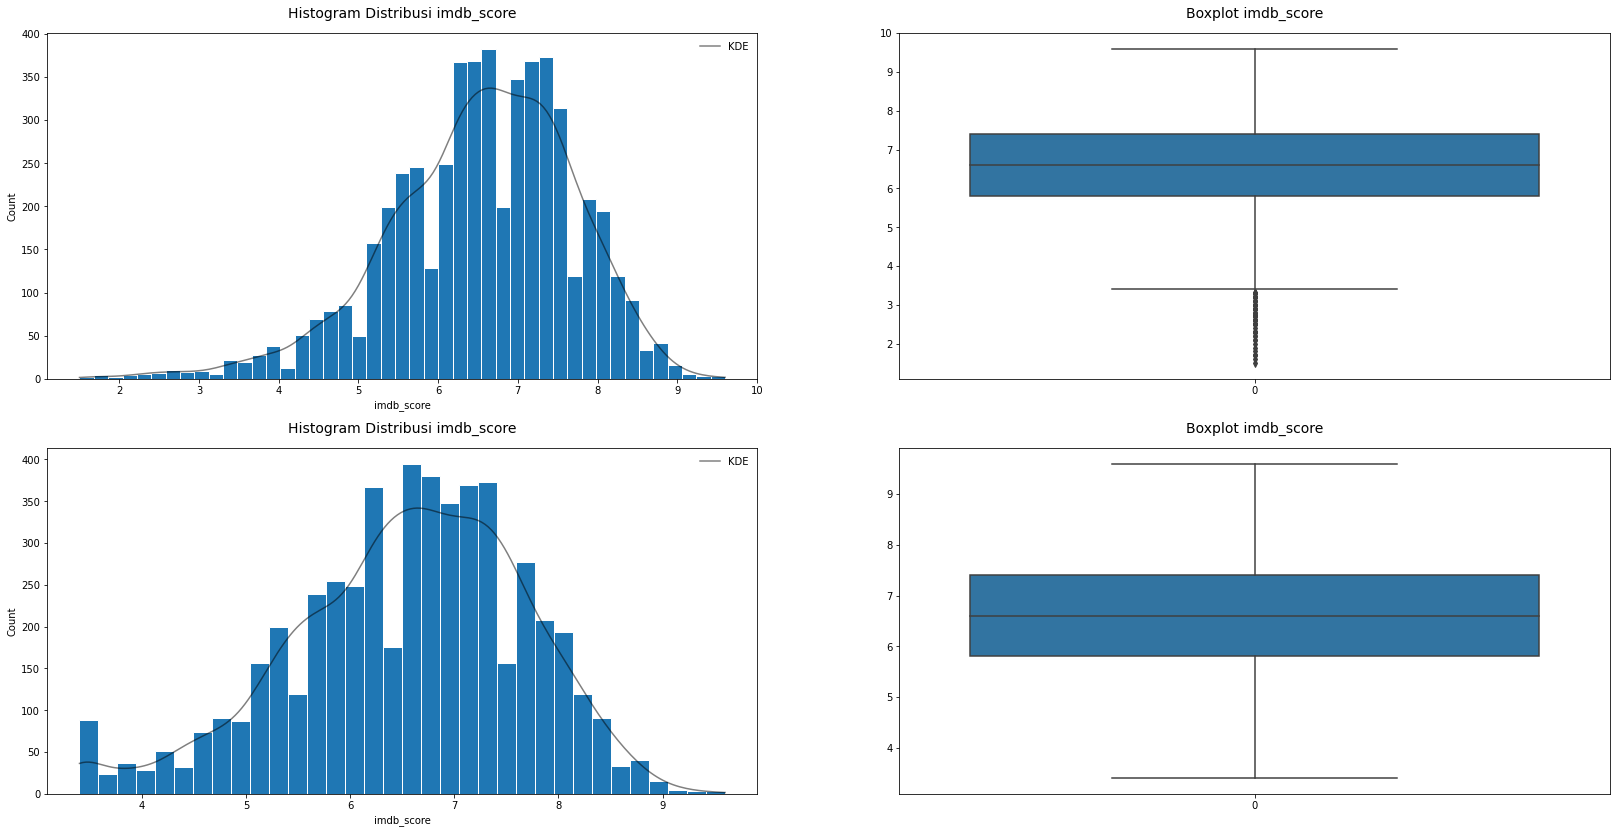


Dashborad imdb_votes:

Deskripsi data baru setelah penghapusan outlier:



count     5267.000000
mean      6906.901652
std       8894.147098
min          5.000000
25%        521.000000
50%       2279.000000
75%      10144.000000
max      24578.500000
Name: imdb_votes, dtype: float64

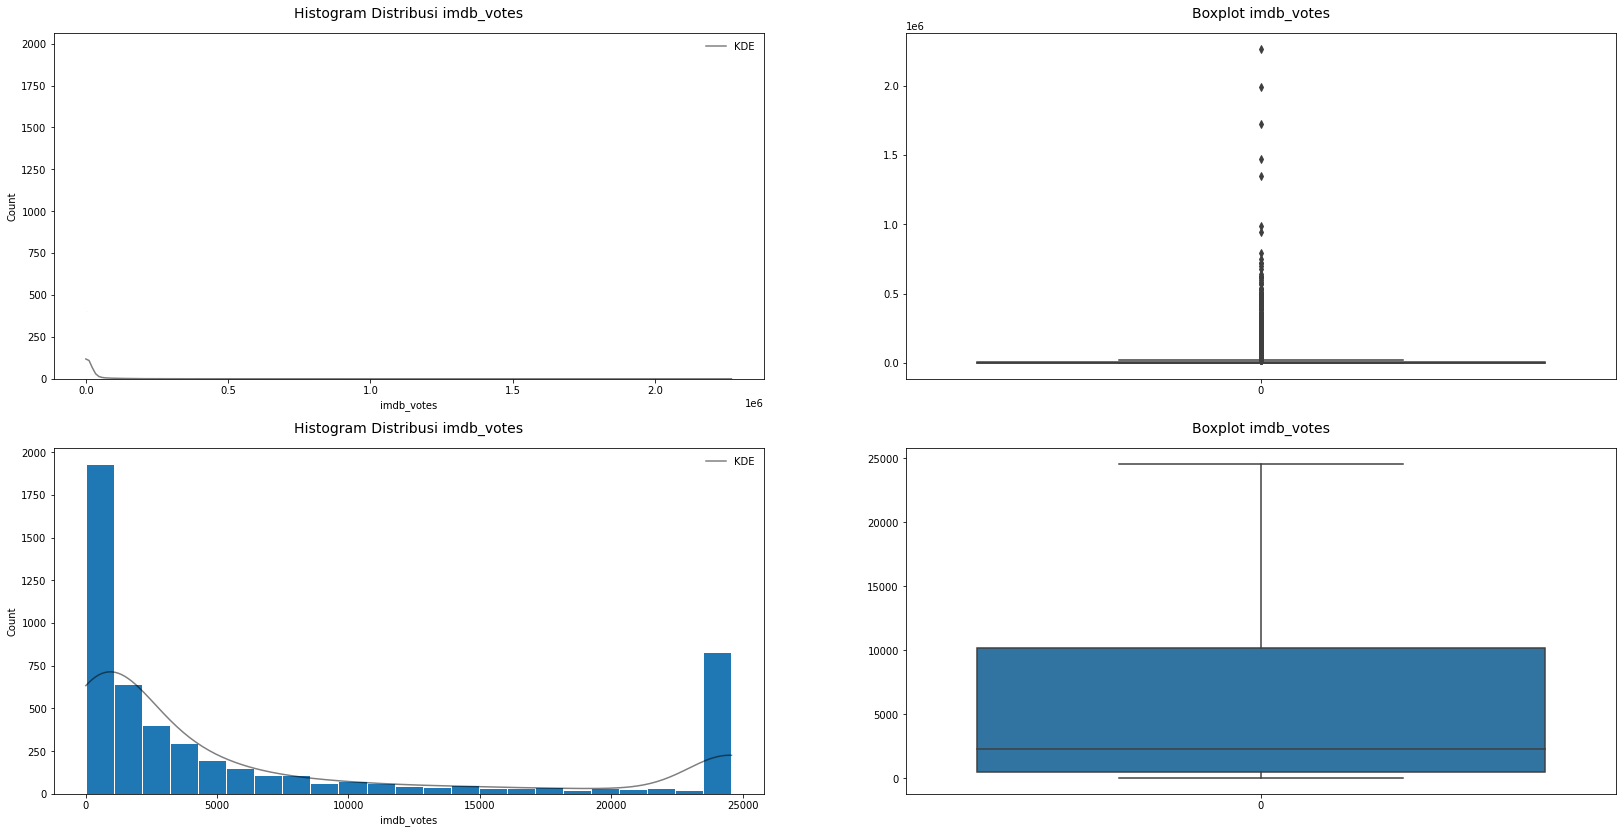


Dashborad tmdb_popularity:

Deskripsi data baru setelah penghapusan outlier:



count    5712.000000
mean       12.735051
std        12.647327
min         0.009442
25%         3.155250
50%         7.478000
75%        17.775750
max        39.706500
Name: tmdb_popularity, dtype: float64

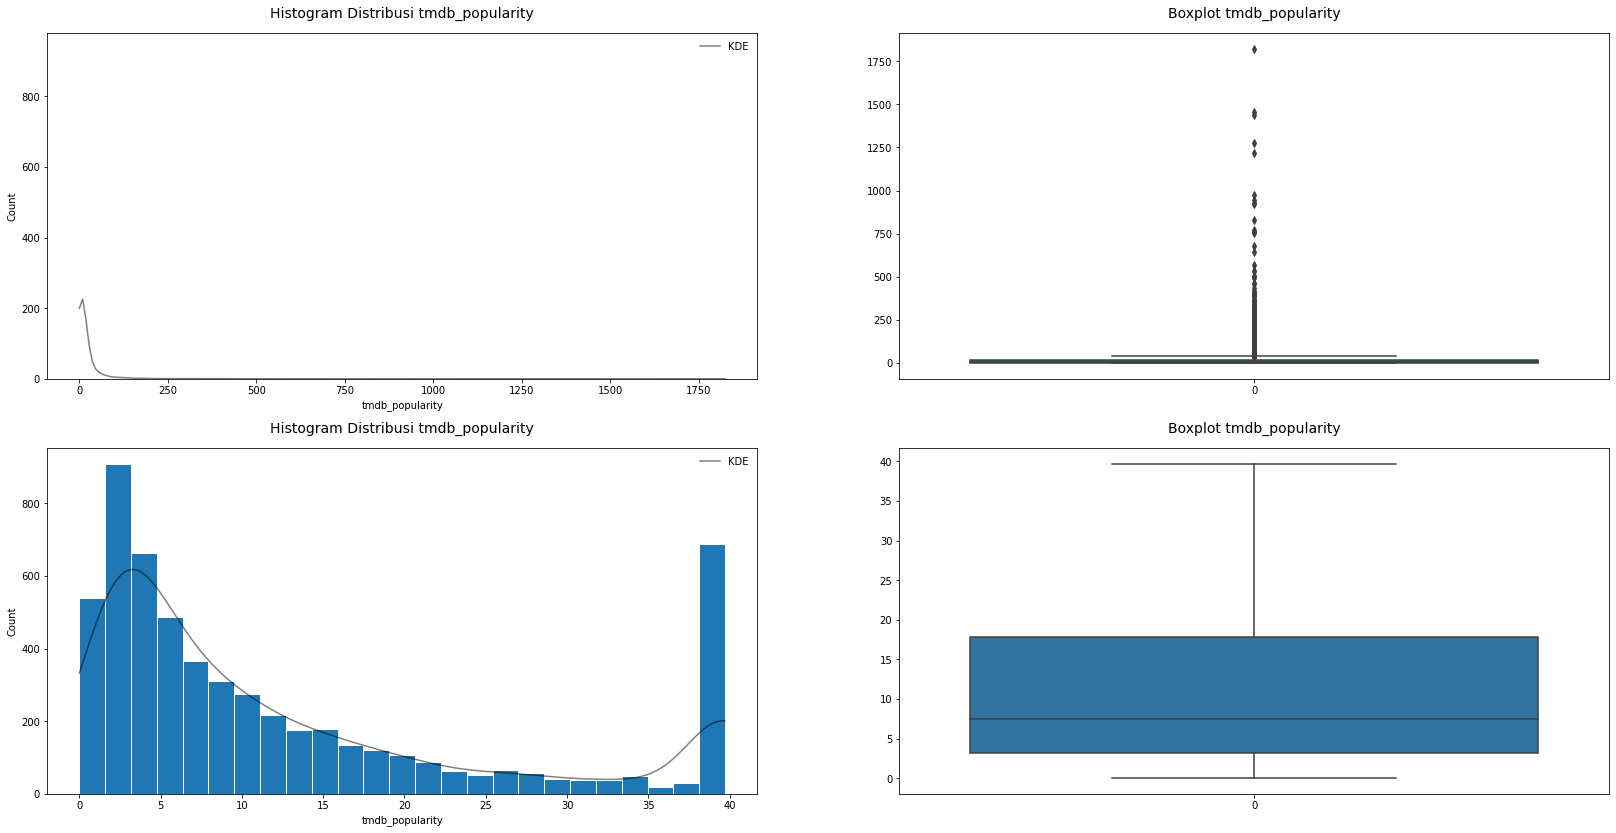


Dashborad tmdb_score:

Deskripsi data baru setelah penghapusan outlier:



count    5488.000000
mean        6.829592
std         1.099616
min         4.000000
25%         6.100000
50%         6.900000
75%         7.500000
max         9.600000
Name: tmdb_score, dtype: float64

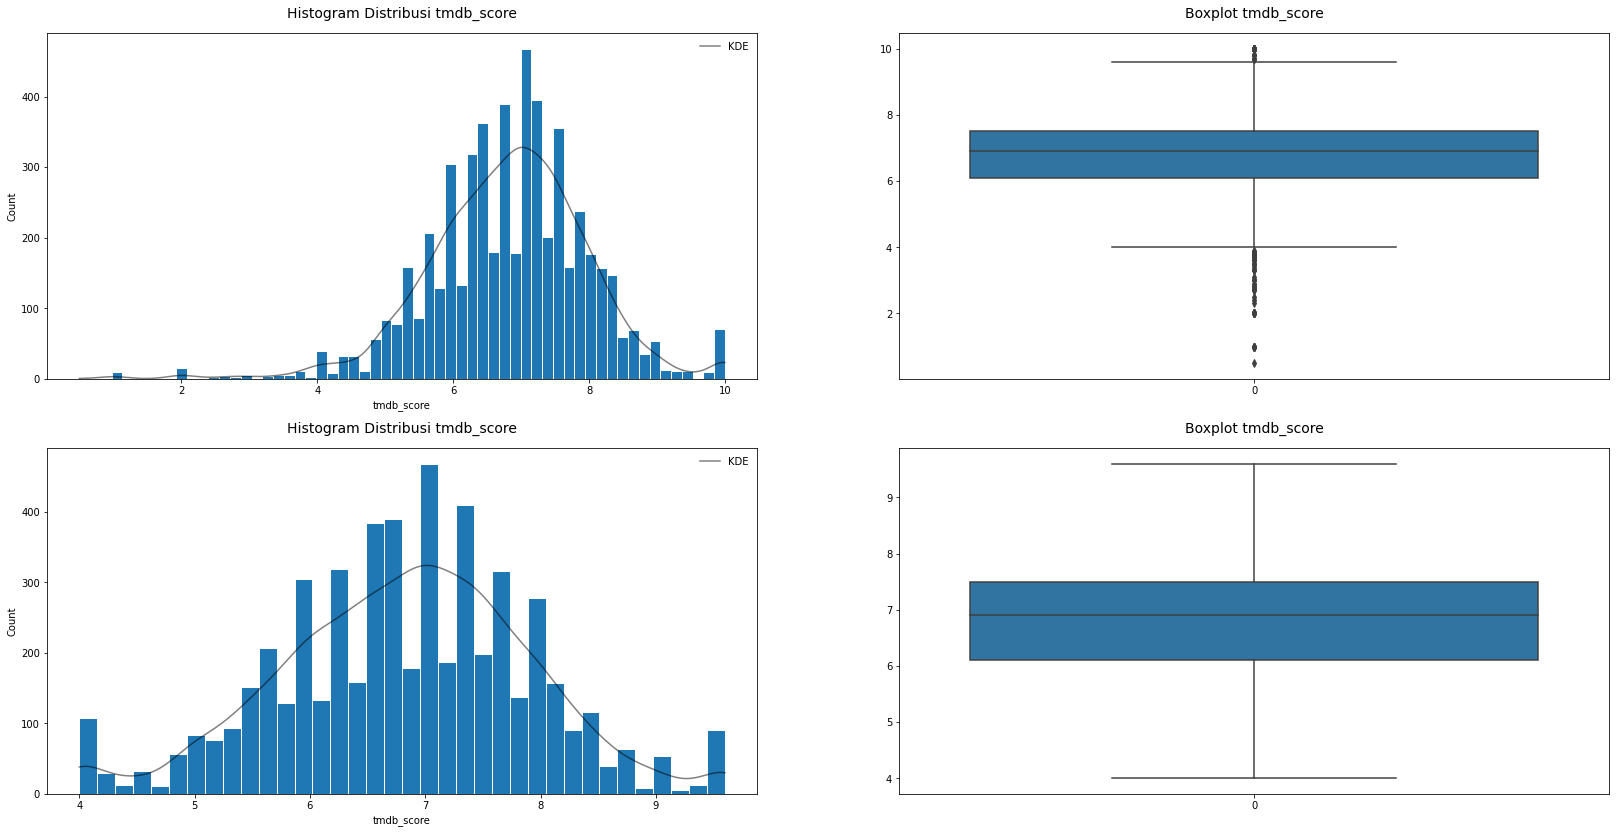

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def hist_function(item,df_content):
  # Plot seaborn histogram overlaid with KDE
  ax = sns.histplot(data=df_content[item], alpha= 1, kde=True,
                    edgecolor='white', linewidth=1,
                    line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label='KDE'))
  ax.get_lines()[0].set_color('black') 

  # Edit legemd and add title
  ax.legend(frameon=False)
  ax.set_title('Histogram Distribusi {}'.format(item), fontsize=14, pad=15)
  return ax

def box_function(item,df_content):
  bx = sns.boxplot(data=df_content[item].to_list())
  
  # Edit legemd and add title
  bx.set_title('Boxplot {}'.format(item), fontsize=14, pad=15)
  return bx

imbd_col = ["imdb_score","imdb_votes","tmdb_popularity","tmdb_score"]
for item in imbd_col:
  print("Dashborad {}:".format(item)) ; print()
  percentile25 = df_content[item].quantile(0.25)
  percentile75 = df_content[item].quantile(0.75)

  iqr = percentile75 -percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr

  new_df = df_content.copy(deep=True)
  new_df = new_df.dropna(subset=[item])
  new_df[item] = np.where(
    new_df[item] > upper_limit,
    upper_limit,
    np.where(
        new_df[item] < lower_limit,
        lower_limit,
        new_df[item]
    )
  )
  print("Deskripsi data baru setelah penghapusan outlier:") ; print()
  display(new_df[item].describe())
  print()
  plt.figure(figsize=(28,14))
  plt.subplot(2,2,1)
  hist_function(item,df_content)
  plt.subplot(2,2,2)
  box_function(item,df_content)
  plt.subplot(2,2,3)
  hist_function(item,new_df)
  plt.subplot(2,2,4)
  box_function(item,new_df)
  plt.show()
  print()